<a href="https://colab.research.google.com/github/NaraaBold/DiverNaraa/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementation of Kmeans in scratch 

[Problem 1] Determine the initial value of the center point

[Problem 2] Creation of a function to obtain SSE

[Problem 3] Allocation to cluster

[Problem 4] Movement of the center point

[Problem 5] Repeat

[Problem 6] Calculate with different initial values

[Question 7] Presumption

In [52]:
# Implementation of KMeans in scratch

import numpy as np
from numpy import linalg as LA


class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters=2, n_init=20,n_iter=100,verbose=False):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.n_iter = n_iter
        self.verbose = verbose
        self.best_sse = 10**20

    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        for i in range(self.n_init):
          self.myu = X[np.random.choice(len(X),size=self.n_clusters,replace=False)]
          cluster = np.zeros(len(X))
          X_cluster = np.concatenate([X,cluster.reshape(-1,1)],axis=1)
          for j in range(self.n_iter):
            self.calc_sse(X_cluster)
            self._update_cluster(X_cluster)
            self._update_myu(X_cluster)
            if self.verbose:
                print("初期化：%s　学習回数：%s　最善のSSE：%s"%(i,j,self.best_sse))

    def predict(self, X):
      y_pred = np.zeros(len(X))
      for i in range(len(X)):
        dist_m = 10**20
        for j in range(self.record_cluster):
            dist = np.sqrt(np.sum((X[i]-self.record_myu[j])**2))
            if dist < dist_m:
                dist_m = dist
                y_pred[i] = j
      return y_pred

    def calc_sse(self,X):
        sse = 0
        for i in range(len(X)):
            for j in range(self.n_clusters):
                if j == X[i,-1]:
                    sse += np.sum((X[i,:-1]-self.myu[j])**2)
        if self.best_sse > sse:
            self.best_sse = sse
            self.record_myu = self.myu
            self.record_cluster = self.n_clusters

    def _update_cluster(self,X):
        for i in range(len(X)):
            dist_m = 10**20
            for j in range(self.n_clusters):
                dist = np.sqrt(np.sum((X[i,:-1]-self.myu[j])**2))
                if dist < dist_m:
                    dist_m = dist
                    X[i,-1] = j

    def _update_myu(self,X):
        for j in range(self.n_clusters):
            self.myu[j] = np.mean(X[X[:,-1]==j,:-1],axis=0)

    def silhouette(self, X):
      a = np.zeros(len(X))
      b = np.zeros(len(X))
      self.s = np.zeros(len(X))
      pred = self.predict(X)
      
      for i in range(len(X)):
        for j in range(self.n_clusters):
          if pred[i] == j:
            a[i] = (np.mean(LA.norm(X[pred == j], ord=2, axis = 1)))
            b[i] = (np.mean(LA.norm(X[pred != j], ord=2, axis = 1)))
            self.s[i] = (b[i] - a[i])/np.max([a[i], b[i]])

      self.silhouette_avg = np.mean(self.s)
      self.y_km = pred
      self.cluster_labels = np.unique(pred)


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

X_train, X_valid = train_test_split(X,train_size=0.8,random_state=None)

In [38]:
clf = ScratchKMeans(n_clusters=4, n_init=5,n_iter=100,verbose=False)
clf.fit(X_train)

pred = clf.predict(X_valid)
print (pred)

[2. 0. 3. 3. 1. 1. 0. 0. 0. 3. 2. 2. 1. 3. 2. 1. 2. 0. 2. 1.]


[Problem 8] Implementation of elbow method

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


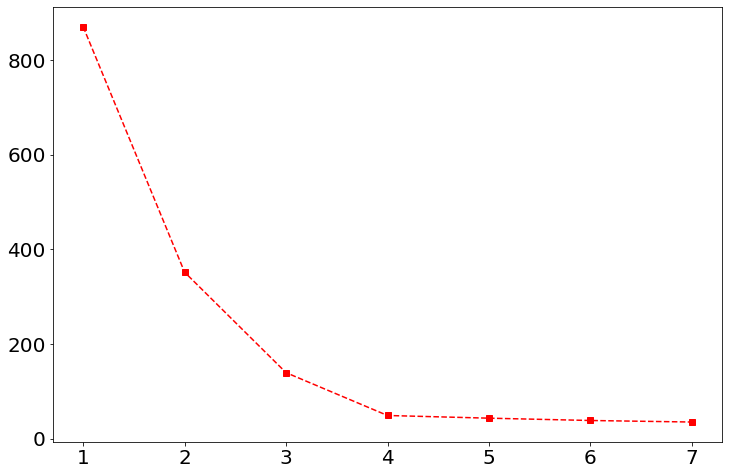

In [51]:
elbow = {}
for k in range(1,8):
    model = ScratchKMeans(n_clusters=k,n_init=5,n_iter=100,verbose=False)
    model.fit(X)
    elbow[k] = model.best_sse
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.plot(list(elbow.keys()),list(elbow.values()),'rs--');

[Problem 9] (Advance task) Silhouette diagram

In [33]:
from numpy import linalg as LA
a = np.zeros(len(X_valid))
b = np.zeros(len(X_valid))
s = np.zeros(len(X_valid))
for i in range(len(X_valid)):
  for j in range(4):
    if pred[i] == j:
      a[i] = (np.mean(LA.norm(X_valid[pred == j], ord=2, axis = 1)))
      b[i] = (np.mean(LA.norm(X_valid[pred != j], ord=2, axis = 1)))
      s[i] = (b[i] - a[i])/np.max([a[i], b[i]])

print (a)
print (b)
print (s)

[3.52206177 1.99504546 4.28952256 4.28952256 8.14939031 8.14939031
 1.99504546 1.99504546 1.99504546 4.28952256 3.52206177 3.52206177
 8.14939031 4.28952256 3.52206177 8.14939031 3.52206177 1.99504546
 3.52206177 8.14939031]
[4.84859065 5.26916083 4.49090934 4.49090934 3.21771254 3.21771254
 5.26916083 5.26916083 5.26916083 4.49090934 4.84859065 4.84859065
 3.21771254 4.49090934 4.84859065 3.21771254 4.84859065 5.26916083
 4.84859065 3.21771254]
[ 0.27359061  0.62137321  0.04484321  0.04484321 -0.60515911 -0.60515911
  0.62137321  0.62137321  0.62137321  0.04484321  0.27359061  0.27359061
 -0.60515911  0.04484321  0.27359061 -0.60515911  0.27359061  0.62137321
  0.27359061 -0.60515911]


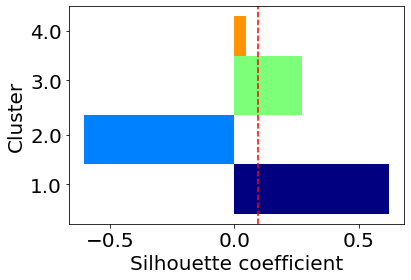

In [40]:
from matplotlib import cm

clf.silhouette(X_valid)
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(clf.cluster_labels):
    c_silhouette_vals = clf.s[clf.y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / clf.n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

plt.axvline(clf.silhoutte_avg, color="red", linestyle="--")
plt.yticks(yticks, clf.cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

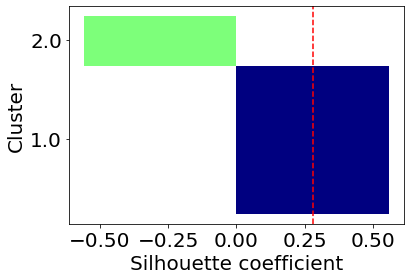

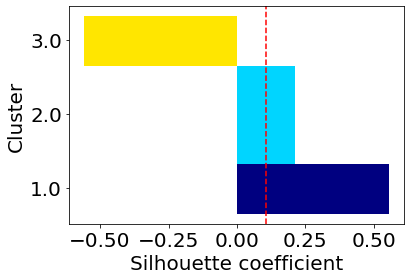

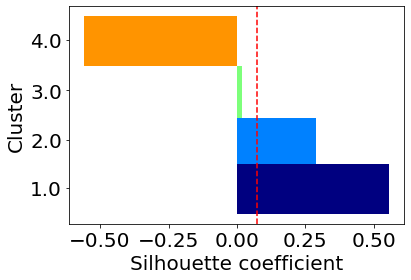

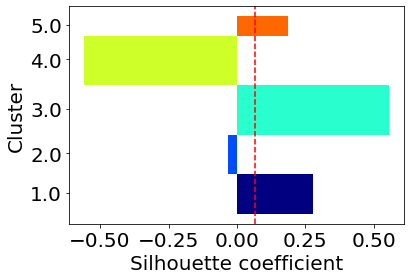

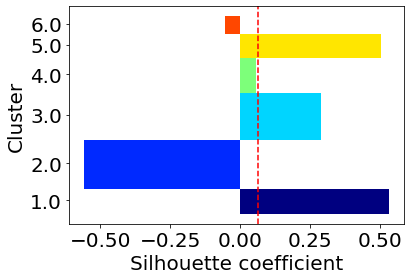

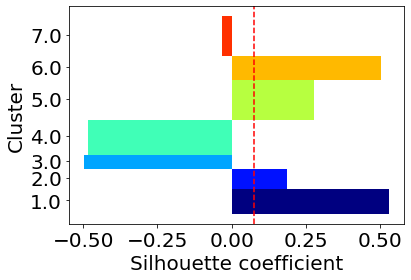

In [54]:
#Not sure about this diagram
for k in range(2,8):
    clf = ScratchKMeans(n_clusters=k,n_init=5,n_iter=100,verbose=False)
    clf.fit(X_train)
    clf.silhouette(X_train)
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(clf.cluster_labels):
      c_silhouette_vals = clf.s[clf.y_km == c]
      c_silhouette_vals.sort()
      y_ax_upper += len(c_silhouette_vals)
      color = cm.jet(i / clf.n_clusters)
      plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
      yticks.append((y_ax_lower + y_ax_upper) / 2)
      y_ax_lower += len(c_silhouette_vals)

    plt.axvline(clf.silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, clf.cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.show()


Wholesale customer dataaset

In [63]:
data = pd.read_csv('Wholesale customers data.csv')
X = data[['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].values
print (data.head(5))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


[0.44082893 0.72459292 0.84793705 0.94189209 0.98950481 1.        ]


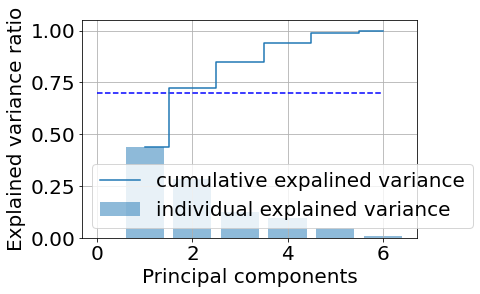

In [64]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=None)
pca = pca.fit(X)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()


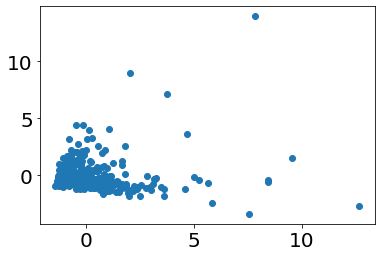

In [69]:
n = 2
pca = PCA(n_components=n)
pca = pca.fit(X)
pca_data = pca.transform(X)

plt.scatter(pca_data[:,0], pca_data[:,1])
plt.show()

[Problem 10] Selection of the number of clusters k

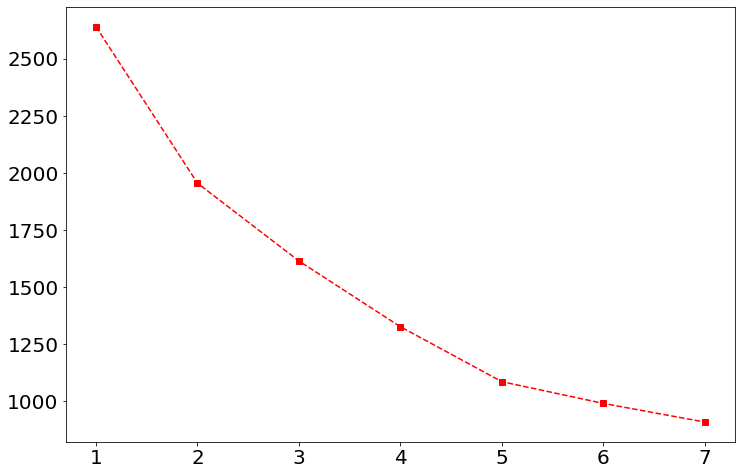

In [80]:
elbow = {}
for k in range(1,8):
    model = ScratchKMeans(n_clusters=k,n_init=5,n_iter=100,verbose=False)
    model.fit(X)
    elbow[k] = model.best_sse
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.plot(list(elbow.keys()),list(elbow.values()),'rs--');

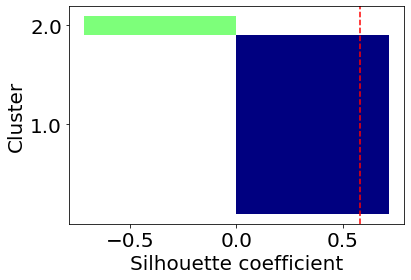

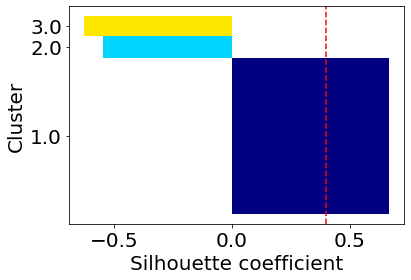

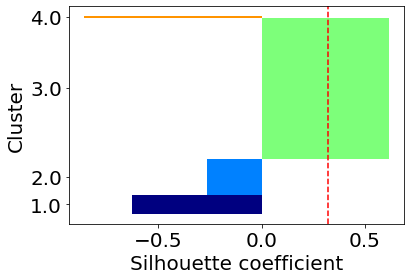

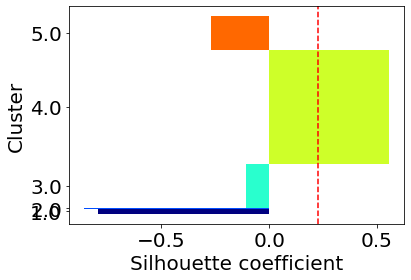

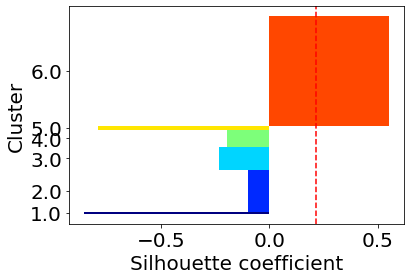

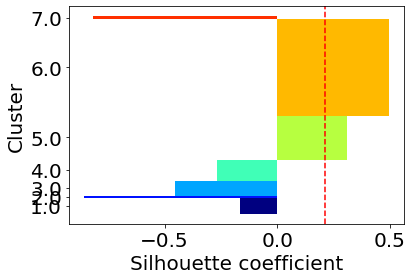

In [66]:
for k in range(2,8):
    clf = ScratchKMeans(n_clusters=k,n_init=5,n_iter=100,verbose=False)
    clf.fit(X)
    clf.silhouette(X)
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(clf.cluster_labels):
      c_silhouette_vals = clf.s[clf.y_km == c]
      c_silhouette_vals.sort()
      y_ax_upper += len(c_silhouette_vals)
      color = cm.jet(i / clf.n_clusters)
      plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
      yticks.append((y_ax_lower + y_ax_upper) / 2)
      y_ax_lower += len(c_silhouette_vals)

    plt.axvline(clf.silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, clf.cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.show()

According to the scatter, elbow and silhouette diagram, I decided to perform the analysis with 6 clusters.

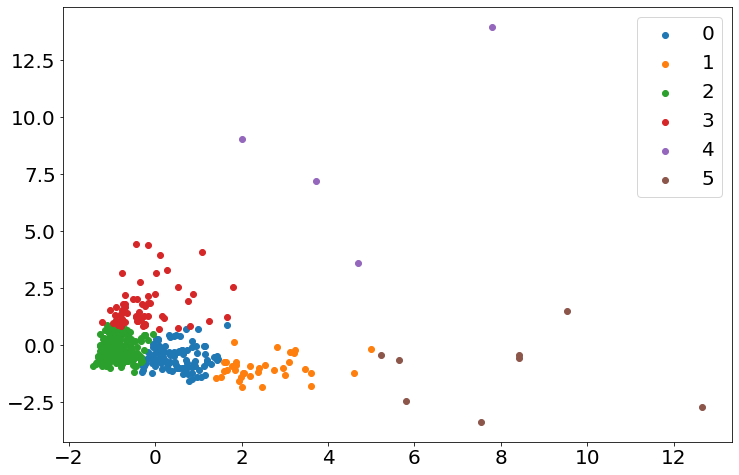

In [97]:
clf = ScratchKMeans(n_clusters=6,n_init=5,n_iter=100,verbose=False)
clf.fit(pca_data)
cluster = clf.predict(pca_data)

pca_data_label = np.concatenate([pca_data, cluster.reshape(-1,1)], axis=1)

fig = plt.subplots(figsize=(12,8))
for i in range(clf.n_clusters):
  plt.scatter(pca_data_label[cluster==i,0], pca_data_label[cluster == i,1], label = i)
plt.legend()
plt.show()

[Problem 11] Comparison with known groups

In [99]:
summary_df = pd.DataFrame({'pred':cluster,'Region':data['Region'],'Channel':data['Channel'],})
pd.pivot_table(summary_df, index='Region', columns='pred',values='Channel', aggfunc=len)

pred,0.0,1.0,2.0,3.0,4.0,5.0
Region,,,,,,
1,16.0,6.0,45.0,9.0,NaN,1.0
2,9.0,7.0,25.0,4.0,1.0,1.0
3,80.0,22.0,154.0,51.0,3.0,6.0


In [100]:
pd.pivot_table(summary_df, index='Channel', columns='pred',values='Region', aggfunc=len)

pred,0.0,1.0,2.0,3.0,4.0,5.0
Channel,,,,,,
1,23.0,NaN,216.0,56.0,3.0,NaN
2,82.0,35.0,8.0,8.0,1.0,8.0


[Problem 12] Useful information for wholesalers

In [95]:
data['cluster'] = cluster
print(data.groupby('cluster').describe())
print (data.groupby('cluster').mean())


        Channel                                               Region  \
          count      mean       std  min  25%  50%   75%  max  count   
cluster                                                                
0.0         4.0  1.250000  0.500000  1.0  1.0  1.0  1.25  2.0    4.0   
1.0        35.0  2.000000  0.000000  2.0  2.0  2.0  2.00  2.0   35.0   
2.0       224.0  1.035714  0.185992  1.0  1.0  1.0  1.00  2.0  224.0   
3.0        64.0  1.125000  0.333333  1.0  1.0  1.0  1.00  2.0   64.0   
4.0         8.0  2.000000  0.000000  2.0  2.0  2.0  2.00  2.0    8.0   
5.0       105.0  1.780952  0.415585  1.0  2.0  2.0  2.00  2.0  105.0   

                   ... Detergents_Paper          Delicassen                \
             mean  ...              75%      max      count          mean   
cluster            ...                                                      
0.0      2.750000  ...          4489.75   4948.0        4.0  19656.250000   
1.0      2.457143  ...         12973.00  18

50% of customers are in cluster 2. They spent less money than other clusters in Milk, Grocery, Detergents_Paper, and Delicatessen. They spend more money on Fresh and Frozen products than customers of 1 and 5th cluster.

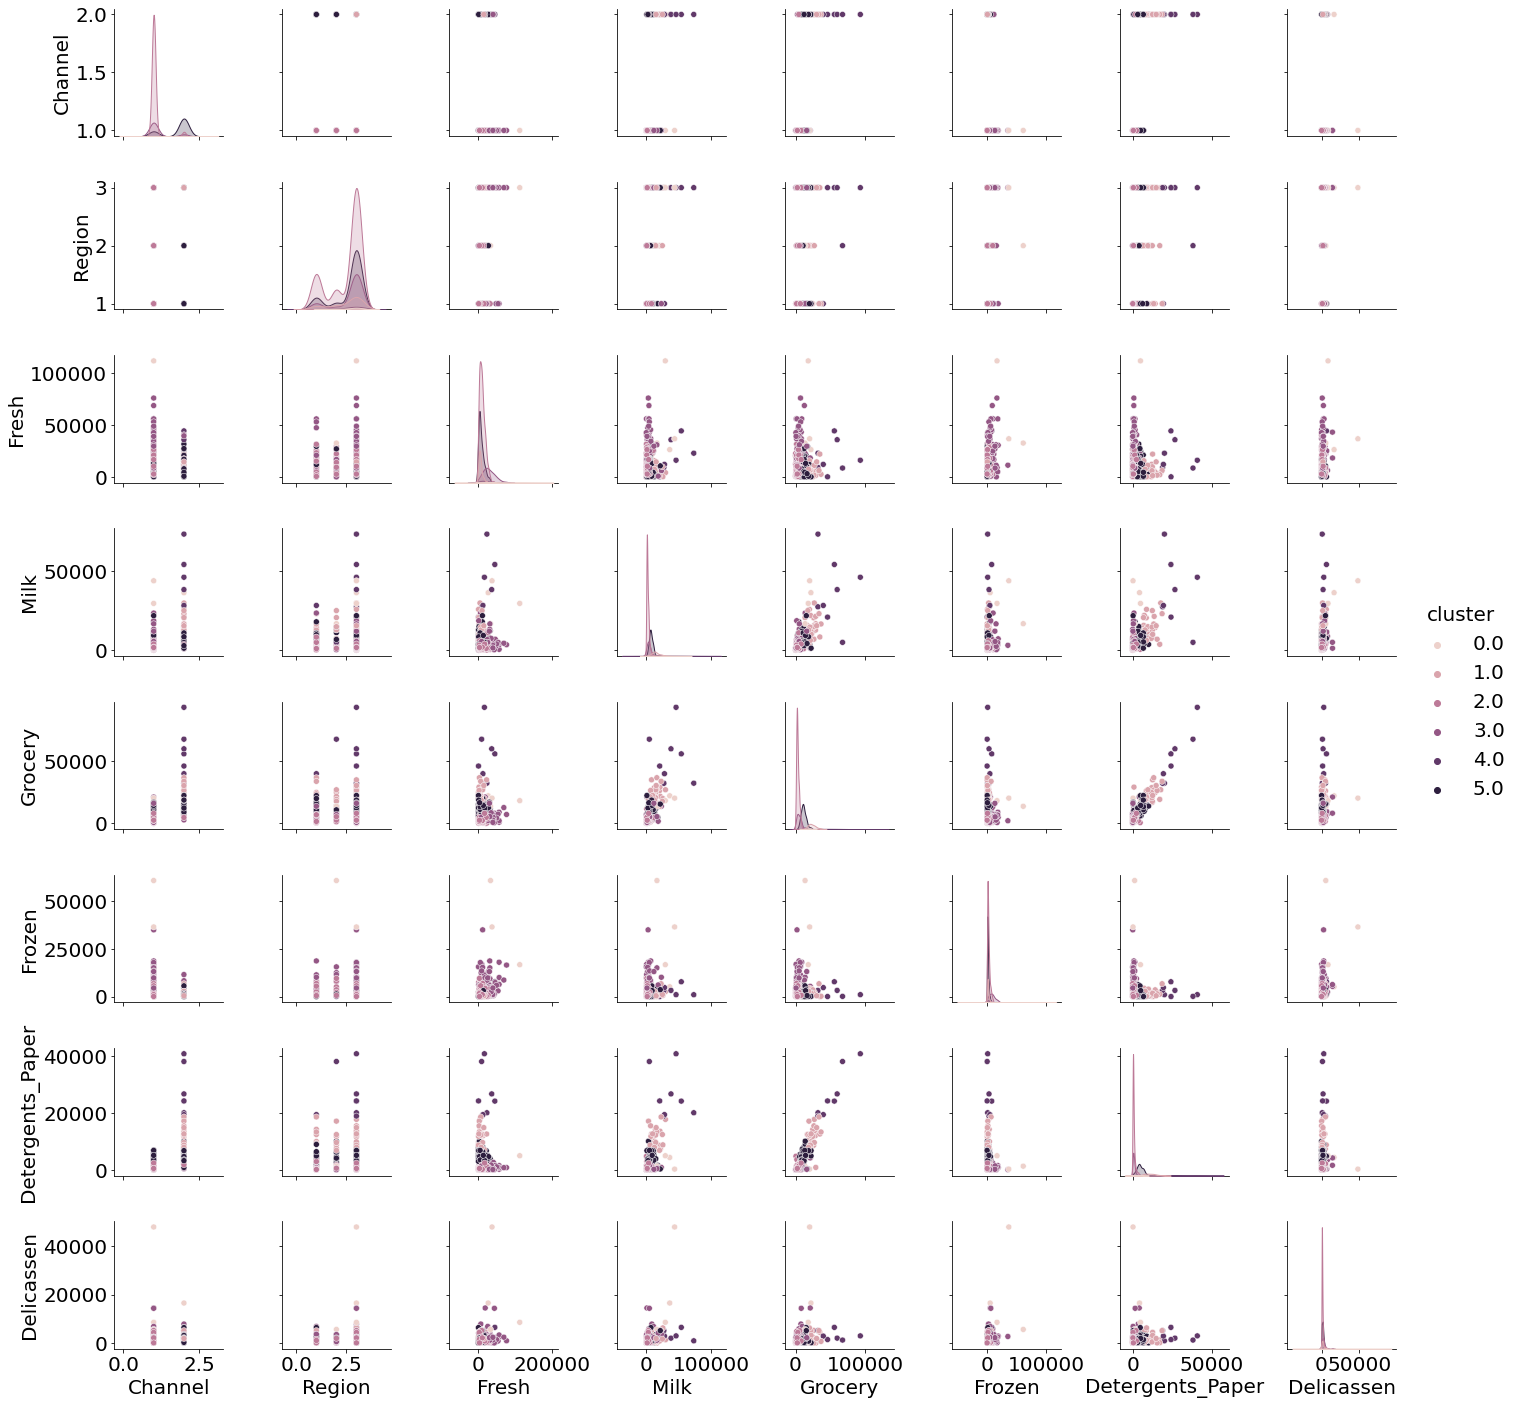

In [96]:
import seaborn as sns
sns.pairplot(data, hue = 'cluster')

[Problem 14] (Advance issue) Use of t-SNE and DBSCAN

In [117]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

X_embedded = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(X)
print (X_embedded.shape)
clustering = DBSCAN(eps= 2, min_samples=5).fit(X_embedded)
print (clustering.labels_)

(440, 2)
[ 4  0 -1  1  5  4  2  0  2  0  0  3  4  4  4  3  0 -1  4  2  4  1 -1 -1
 -1  2  3  3 -1  3  4  3  3  3  3  0  5  0  0  3 -1  4  0  0  0 -1  0  0
  0  0  1 -1  3  0  3  2  0  0  3  0  2  0  0  0  1  0  0  4 -1  3  1 -1
  1  1  0  3  1  0  3  3  3  0  0  3  2  0  0 -1  1  5  3  1  0  6  0  3
  0  3  3  1  0  0  0  3  3  3  0  0  0  0  3  0  1 -1  3  3  3 -1  3  1
  3  3  3 -1  3  3  1  4  3  3  1  3  3  3  3  3  0  3  4  3  4 -1  3  1
  3  0  3  3  1  3  3  3  3  3  3  0  0  3  0  0  0  3  3  0  0  0  0  3
  3 -1  0 -1  0  0  3  0  3  4  3  1  4  3  0 -1  3  3  1  0  0  0  1  3
  3  0  3  1  1  0  3  3  0  0 -1  3  3  0  3  0  0  0  3  0  3  0  0  0
  0  3 -1  3  3  0  1  1  3  3  4  3 -1  1  1  3  3  3 -1  3  3  3  3  3
  1  3  3  4  0  0  3  3  3  1  3  0  1  4 -1  3  3  1  3  3  3  1  3  1
  0 -1  0  5  0  3  1  3  3  3  3  3  5  6  1  4  3  4  3  1  3  3  3  1
  3  3  3  3  1  0 -1  2  3  2  0  3  4  0  0  0  0  0  0  3  3  0  6  3
  0 -1  2 -1  1  3  3  0  3  3  3  2  3 -1

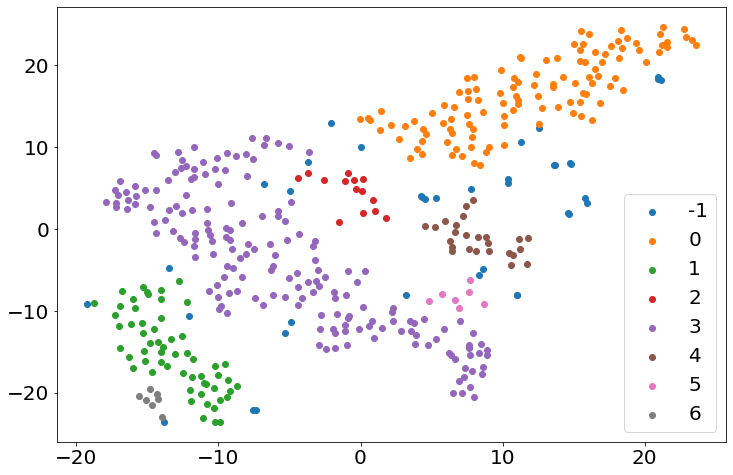

In [118]:
tsne_data_label = np.concatenate([X_embedded, clustering.labels_.reshape(-1,1)], axis=1)
fig = plt.subplots(figsize=(12,8))
for i in np.unique(clustering.labels_):
  plt.scatter(tsne_data_label[clustering.labels_==i,0], tsne_data_label[clustering.labels_== i,1], label = i)
plt.legend()
plt.show()